# Data Analysis

## Context

This comprehensive collection provides detailed information about the highest-ranked chess players globally. It includes their names, ranks, ratings, countries of origin, titles, profile links, profile images, and the date of their last update. You can analyze the strategic minds behind the pieces and examine the prowess of elite grandmasters from different nations. Whether you're an avid chess player, a data analyst, or just curious about the world of competitive chess, this dataset offers valuable insights into the current standings and profiles of the top chess players. The dataset is updated every day, ensuring that you have access to the most up-to-date information.

## Source

The dataset was obtained by scraping the content of the website chess.com.

## Structure

### Columns:

- **Name:** Player's full name
- **Rank:** Global ranking of the player
- **Rating:** Chess rating of the player
- **Country:** Country of origin
- **Title:** Chess title (e.g., Grandmaster)
- **Profile Link:** Link to the player's profile on chess.com
- **Profile Image Link:** Link to the player's profile image
- **Last Updated:** Date of the last update to the dataset (format: DD-MM-YYYY)


https://www.kaggle.com/datasets/everydaycodings/top-global-chess-players/data

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
data = pd.read_csv("Ranking.csv")
data.head()

,name,rank,country,title,profilelink,profileimage,classicalrating,rapidrating,blitzrating,lastupdated
0,Magnus Carlsen,1,Norway,GM,https://www.chess.com/players/magnus-carlsen,https://images.chesscomfiles.com/uploads/v1/ma...,2830,2818,2887,05-12-2023
1,Fabiano Caruana,2,United States,GM,https://www.chess.com/players/fabiano-caruana,https://images.chesscomfiles.com/uploads/v1/ma...,2804,2762,2815,05-12-2023
2,Hikaru Nakamura,3,United States,GM,https://www.chess.com/players/hikaru-nakamura,https://images.chesscomfiles.com/uploads/v1/ma...,2788,2731,2874,05-12-2023
3,Ding Liren,4,China,GM,https://www.chess.com/players/ding-liren,https://images.chesscomfiles.com/uploads/v1/ma...,2780,2830,2787,05-12-2023
4,Ian Nepomniachtchi,5,Russia,GM,https://www.chess.com/players/ian-nepomniachtchi,https://images.chesscomfiles.com/uploads/v1/ma...,2769,2778,2795,05-12-2023


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169774 entries, 0 to 169773
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   name             169774 non-null  object
 1   rank             169774 non-null  int64 
 2   country          169774 non-null  object
 3   title            87173 non-null   object
 4   profilelink      169774 non-null  object
 5   profileimage     7832 non-null    object
 6   classicalrating  169774 non-null  int64 
 7   rapidrating      169774 non-null  int64 
 8   blitzrating      169774 non-null  int64 
 9   lastupdated      169774 non-null  object
dtypes: int64(4), object(6)
memory usage: 13.0+ MB


In [97]:
def remove_unwanted(text):

    if text == "e" or text == "N" or text == "None":
        return None
    else:
        return text

data["rank"] = data["rank"].apply(remove_unwanted)
data["classicalrating"] = data["classicalrating"].apply(remove_unwanted)
data["rapidrating"] = data["rapidrating"].apply(remove_unwanted)
data["blitzrating"] = data["blitzrating"].apply(remove_unwanted)

In [98]:
latest_data = data[data["lastupdated"] == "09-12-2023"]

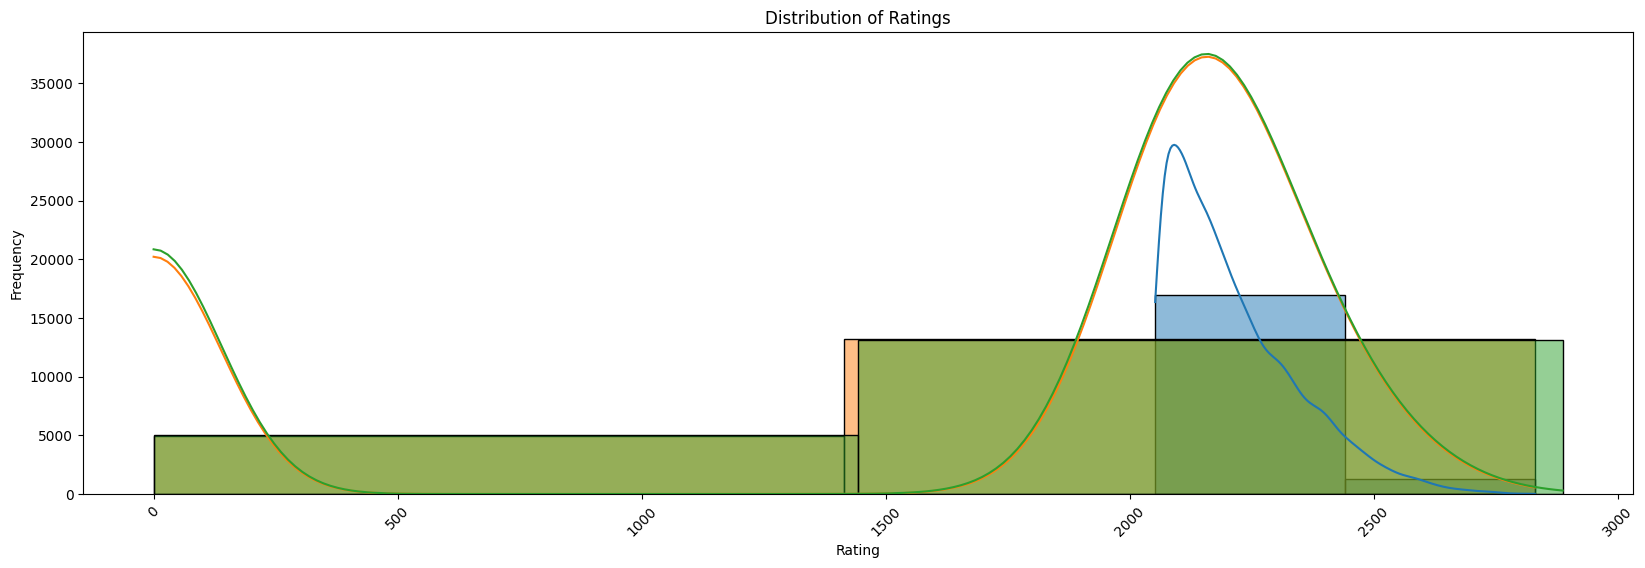

In [99]:
plt.figure(figsize=(20, 6))
sns.histplot(latest_data['classicalrating'], bins=2, kde=True)
sns.histplot(latest_data['rapidrating'], bins=2, kde=True)
sns.histplot(latest_data['blitzrating'], bins=2, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

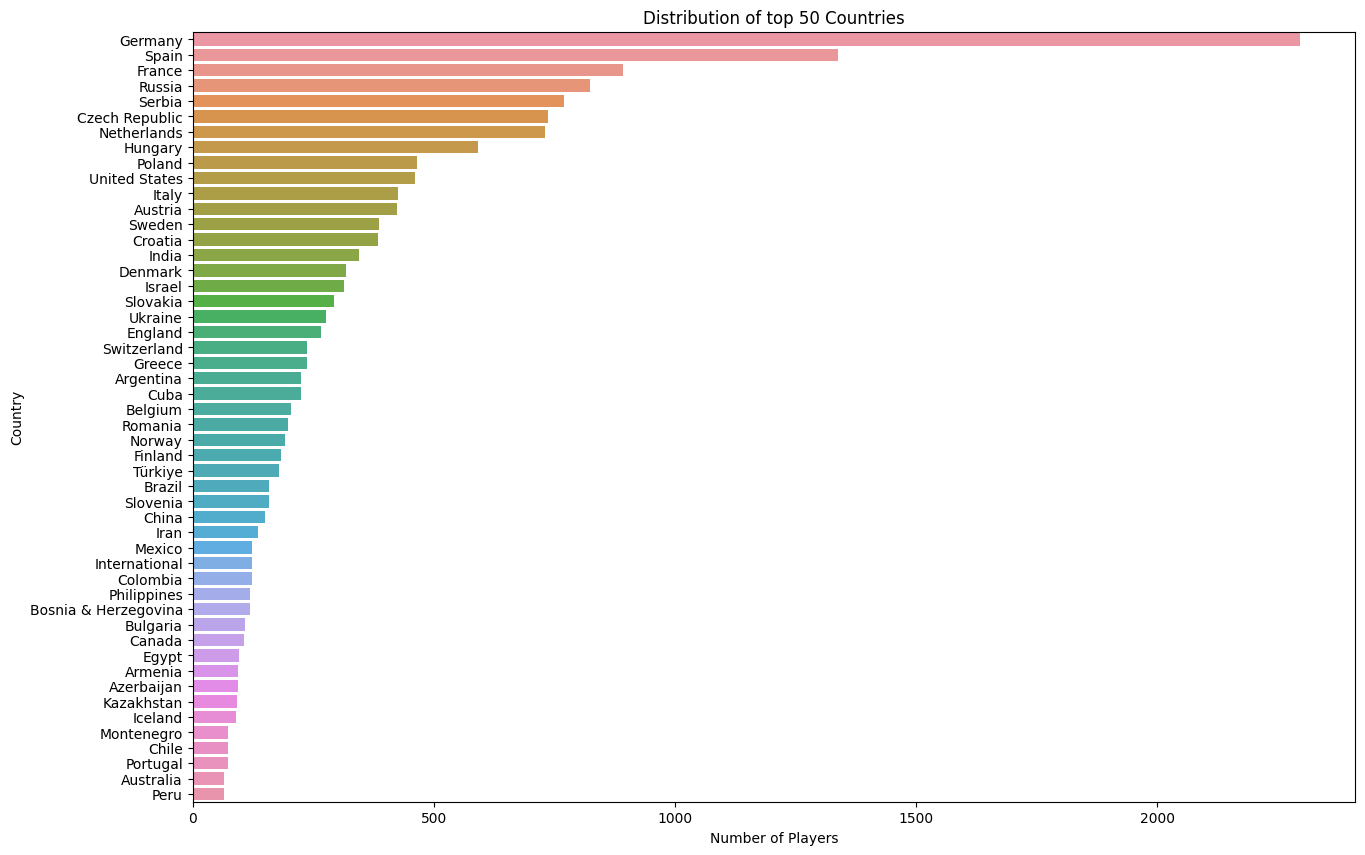

In [100]:
# Plotting the distribution of players' countries
plt.figure(figsize=(15, 10))
sns.countplot(y='country', data=latest_data, order=latest_data['country'].value_counts().head(50).index)
plt.title('Distribution of top 50 Countries')
plt.ylabel('Country')
plt.xlabel('Number of Players')
plt.show()

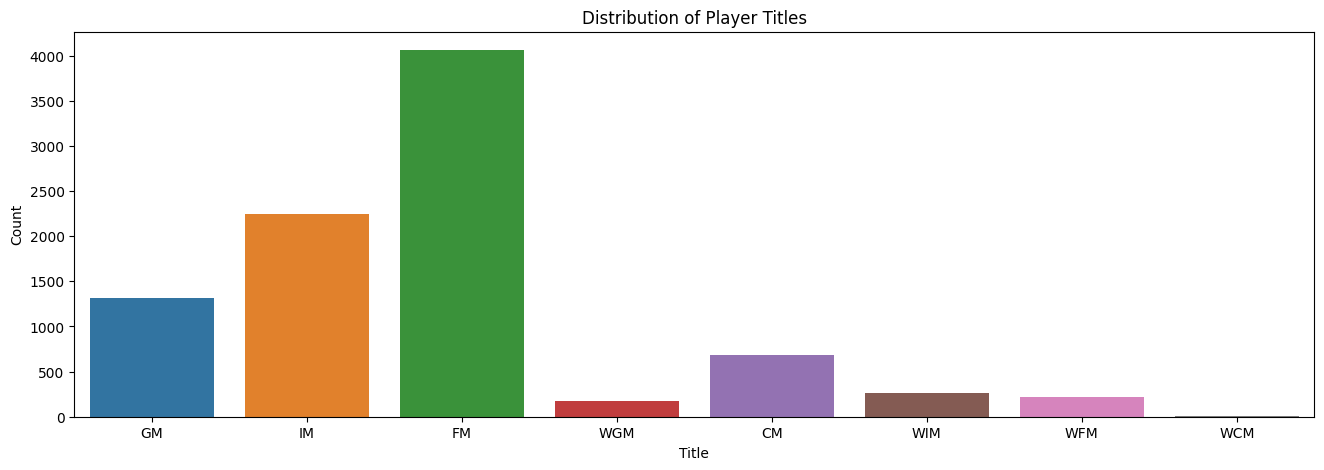

In [101]:
plt.figure(figsize=(16, 5))
sns.countplot(x='title', data=latest_data)
plt.title('Distribution of Player Titles')
plt.xlabel('Title')
plt.ylabel('Count')
plt.show()

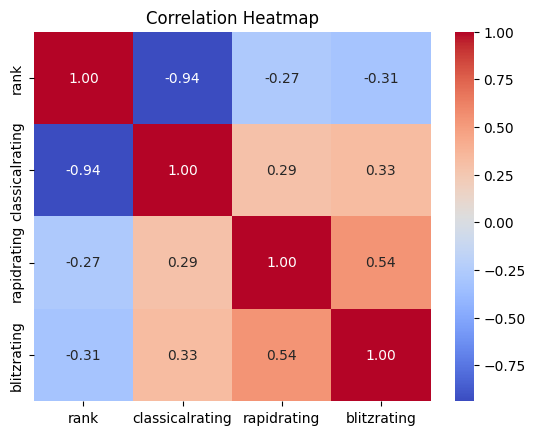

In [102]:
correlation_matrix = data[['rank', 'classicalrating', 'rapidrating', 'blitzrating']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [103]:
import plotly.express as px

# Create a countplot DataFrame for Player Titles by Country
title_counts = data.groupby(['country', 'title']).size().reset_index(name='count')

# Filter to include only the top 50 countries based on player count
top_countries = data['country'].value_counts().head(50).index
title_counts_top50 = title_counts[title_counts['country'].isin(top_countries)]

# Create an interactive bar plot
bar_fig = px.bar(title_counts_top50, x='country', y='count', color='title',
                 labels={'country': 'Country', 'count': 'Count', 'title': 'Title'},
                 title='Distribution of Player Titles in Top 50 Countries')
bar_fig.update_xaxes(tickangle=45)
bar_fig.show()

In [104]:
import plotly.express as px

player_name = "Praggnanandhaa Rameshbabu"
# Assuming you have a DataFrame named df with the appropriate structure
# Make sure your 'lastupdated' column is in datetime format
data['lastupdated'] = pd.to_datetime(data['lastupdated'], format='%d-%m-%Y')

# Filter data for Praggnanandhaa Rameshbabu
magnus_df = data[data['name'] == player_name]

# Line plot for Praggnanandhaa Rameshbabu's Classical Rating over time
rating_fig = px.line(magnus_df, x='lastupdated', y='classicalrating',
                     title='{} - Classical Rating Over Time'.format(player_name),
                     labels={'lastupdated': 'Date', 'rating': 'Rating'})
rating_fig.show()

# Line plot for Praggnanandhaa Rameshbabu's Rapid Rating over time
rating_fig = px.line(magnus_df, x='lastupdated', y='rapidrating',
                     title='{} - Rapid Rating Over Time'.format(player_name),
                     labels={'lastupdated': 'Date', 'rating': 'Rating'})
rating_fig.show()

# Line plot for Praggnanandhaa Rameshbabu's Blitz Rating over time
rating_fig = px.line(magnus_df, x='lastupdated', y='blitzrating',
                     title='{} - Blitz Rating Over Time'.format(player_name),
                     labels={'lastupdated': 'Date', 'rating': 'Rating'})
rating_fig.show()

# Line plot for Praggnanandhaa Rameshbabu's Ranking over time
rank_fig = px.line(magnus_df, x='lastupdated', y='rank',
                   title='{} - Ranking Over Time'.format(player_name),
                   labels={'lastupdated': 'Date', 'rank': 'Ranking'})
rank_fig.show()